### 복습

In [ ]:
과제로 이렇게 확률을 만들어낼 수 있고 다음 글자를 예측해볼 수 있구나를 알 수 있음

지난주 내내 Tokenizing 함 - 여러가지 토큰화 하는 함수들 있었음. stemming(Porter), lemmatization, MA + POS
이걸로 안 끝나서 stemming 과 관련지어서 n-gram 했었고 BPE 했었음.
토큰화 관련해서는 branch entropy, CS(Perplexity)를 했었음.

중요하게 봤어야 하는 것은, 결국에는 문장S가 =ABCD 라면, 우리가 사용하는 언어V = {A, B, C, D, E, F, G, ...}
setence1 = ABCDE.., Vocabulary = {A, B, C, D, E, F, G, ...}
P(S1) = P(A, B, C, D, E)  # 결합확률 -> 이렇게 동시에 하나의 문장이 되는 경우가 거의 없음.(ABCDE 모두 사용되어)
      = P(E|A, B, C, D)P(A, B, C, D)
      = P(E|A, B, C, D)P(D|A, B, C)P(C|A, B)P(B|A)P(A)  # 연쇄법칙 - 조건부확률
    따라서 결합확률을 구할 수 없으니 조건부확률로. 그러나 조건부확률에서도 결합확률처럼 한 곳이 빵꾸가 나면(없는 것이 있으면) 0이 되버리니까
MA(markov assumption, chain rule) 적용
1st MA ~= P(E|D)P(D|C)P(C|B)P(B|A)P(A) 유사하다! 이것이 N-gram 그 중에서 bigram 이 의미하는 바였음.
이것을 이용해서 띄어쓰기도 해본 것.
우리 글 같은 경우는 1음절, 2음절 단어가 매우 많아서 잘 안돌아감.

아래의 것들은 sub-word 라는 분절 찾기 위해서 사용. 그러나 꼭 안 그래도 됨. 분절 중 엔트로피가 가장 높은 것을 봤더니 띄어쓰기라면 이것을 활용할
수도 있음. 확률값을 만들어 냈기 때문에 LM 로 활용할 수 있음.
LM은 확률값을 찾아내고 계산 가능한 형태인 것.
Branch Entropy = sum(-p logp) = -sum(p logp)  엔트로피값이 치솟는 부분을 찾음. 이 때 P 를 어떻게 정의하느냐.
이 p를 정의하기 위해서 p(s1) = {token ㅌ s1}, sum(p(i|1-i-1) * log p)
                i=2, p(2번째나오는 글자|1번부터 바로 앞 글자 = 1)
                i=3, p(3번째글자|1번부터 바로 앞 글자 = 1,2) ...
        
        p(i|1-i-1) * log p 이게 엔트로피. 엔트로피를 구하기 위해서 확률을 이용한 것.

CS(Perplexity) = (1/p(s1)) **(1/len(s1))  -> 이 값이 커지거나 작아지거나 함. 보통은 작아지는 것이 좋음(확률을 뒤집어놓은 형태라서)
               p(s1) **(1/len(s1))
               -> 글자가 길어지면 길어질 수록 패널티를 받는 거라서 (1/len(s1)) 을 1/2 로 봄. 여기서는 응집력이 커질 때 좋은 것
        
BytesPairEncoding => WordPieceModel(Google) => SentencePieceModel
얘는 확률로 계산하지 않음. 같이 나온 쌍(Collocation)을 하나의 토큰으로 보자는 것.
여기서는 같이 나온 빈도가 중요. 같이 나온 애들을 계속 합쳐나가는 구조. 그 때 특수한 전략, 특수한 threshold
=> 데이터만 있으면 얼마든지 만들 수 있음. 언어적 지석 필요없음. 확률 필요없음. 그래서 이게 DNN 이랑 아주 잘 맞음

지식베이스(Rule-based) - (통계)확률기반(Corpus) - 통계 - 추론(NN) - 전이학습(오늘날의 딥러닝)
추론이 NN-based 의 Embedding. 전이학습이 Transformer(Attention), Bert, GPT

통계 Co-occurence, Matrix, Decomp.
NNL(P)M - 뉴럴네트워크 랭귀지 모델 -> 구글에서 이것을 기반으로 한 W2V를 만듦.

여기까지 지난주

In [ ]:
지식베이스(Rule-based) - (빈도)확률기반(Corpus) - 통계 - 추론(NN) - 전이학습(*)
                                  <----- NN-based Embedding, Attention
                                  <----- Co-occurence, Matrix, Decomp.
                                                  NNL(P)M - W2V
DNN Model - Upstream(사전학습), Downstream(LM - 분류, 군집, ...)

Normalization - 대소문자, 구두점, 불용어(사전, 규칙 기반)
Edit Distance - 편집거리, 안녕(아녕,안ㄴ녕) => Out Of Voca.(미등록어)

In [ ]:
DNN Model - Upstream(사전학습), Downstream(LM - 분류, 군집, 생성 등등)
우리는 사전학습을 할 일이 거의 없다.

### 수업

In [ ]:
오늘 할 것은
Normalization - 대소문자, 구두점 처리, 불용어(stopwords) 여기까지 (사전, 규칙기반) -> 내 데이터에 적절한 텍스트 조각들을 만들 수 있음.
이후에 Edit Distance 볼 것. 편집거리. 안녕(아녕, 안ㄴ녕) - 오타때문에 다 다르게 인식하고 확률값도 다 다름. 미등록어 문제 발생
편집거리를 통해서 이를 최대한 보정하는 방법 볼 것.

그러면 통계적 방법, 지식베이스 전처리 방법들을 어느정도 해본 것이 됨. 정규식, 지프/힙스의 법칙까지.

이것들은 언어라서 전처리가 이렇게 힘든 것.

In [ ]:
불용어: 지프의 법칙 측면 - 너무 흔해 빠져서 의미를 전달하지 못함. 어디서나 나옴.
     비속어, 사전등재되지 않은 단어, 신조어, ...
        
=> 데이터 전처리하고 피쳐 간 상관관계 보고 데이터 온전한지 보고, missing value 등 이런 과정이랑 똑같은 것.
=> 이로써 좋은 feature 가지고 모델을 만들려고 하는 것.

In [1]:
from nltk.corpus import stopwords

In [2]:
stopwords.fileids()
# nltk 에서 쓰는 불용어 리스트.

['arabic',
 'azerbaijani',
 'basque',
 'bengali',
 'catalan',
 'chinese',
 'danish',
 'dutch',
 'english',
 'finnish',
 'french',
 'german',
 'greek',
 'hebrew',
 'hinglish',
 'hungarian',
 'indonesian',
 'italian',
 'kazakh',
 'nepali',
 'norwegian',
 'portuguese',
 'romanian',
 'russian',
 'slovene',
 'spanish',
 'swedish',
 'tajik',
 'turkish']

In [3]:
# 영어에서 쓰는 불용어
print(stopwords.open('english').read())
# 대명사, 지시대명사, 접속사, wh- 등등 => 문법상 필요한 애들인데, 의미를 전달하지는 않음. 뒤에 오는 애들이 의미를 전달할 것.

i
me
my
myself
we
our
ours
ourselves
you
you're
you've
you'll
you'd
your
yours
yourself
yourselves
he
him
his
himself
she
she's
her
hers
herself
it
it's
its
itself
they
them
their
theirs
themselves
what
which
who
whom
this
that
that'll
these
those
am
is
are
was
were
be
been
being
have
has
had
having
do
does
did
doing
a
an
the
and
but
if
or
because
as
until
while
of
at
by
for
with
about
against
between
into
through
during
before
after
above
below
to
from
up
down
in
out
on
off
over
under
again
further
then
once
here
there
when
where
why
how
all
any
both
each
few
more
most
other
some
such
no
nor
not
only
own
same
so
than
too
very
s
t
can
will
just
don
don't
should
should've
now
d
ll
m
o
re
ve
y
ain
aren
aren't
couldn
couldn't
didn
didn't
doesn
doesn't
hadn
hadn't
hasn
hasn't
haven
haven't
isn
isn't
ma
mightn
mightn't
mustn
mustn't
needn
needn't
shan
shan't
shouldn
shouldn't
wasn
wasn't
weren
weren't
won
won't
wouldn
wouldn't



In [4]:
stop = stopwords.open('english').read()

In [5]:
stop
# 어퍼스트로피 살려야됨.

"i\nme\nmy\nmyself\nwe\nour\nours\nourselves\nyou\nyou're\nyou've\nyou'll\nyou'd\nyour\nyours\nyourself\nyourselves\nhe\nhim\nhis\nhimself\nshe\nshe's\nher\nhers\nherself\nit\nit's\nits\nitself\nthey\nthem\ntheir\ntheirs\nthemselves\nwhat\nwhich\nwho\nwhom\nthis\nthat\nthat'll\nthese\nthose\nam\nis\nare\nwas\nwere\nbe\nbeen\nbeing\nhave\nhas\nhad\nhaving\ndo\ndoes\ndid\ndoing\na\nan\nthe\nand\nbut\nif\nor\nbecause\nas\nuntil\nwhile\nof\nat\nby\nfor\nwith\nabout\nagainst\nbetween\ninto\nthrough\nduring\nbefore\nafter\nabove\nbelow\nto\nfrom\nup\ndown\nin\nout\non\noff\nover\nunder\nagain\nfurther\nthen\nonce\nhere\nthere\nwhen\nwhere\nwhy\nhow\nall\nany\nboth\neach\nfew\nmore\nmost\nother\nsome\nsuch\nno\nnor\nnot\nonly\nown\nsame\nso\nthan\ntoo\nvery\ns\nt\ncan\nwill\njust\ndon\ndon't\nshould\nshould've\nnow\nd\nll\nm\no\nre\nve\ny\nain\naren\naren't\ncouldn\ncouldn't\ndidn\ndidn't\ndoesn\ndoesn't\nhadn\nhadn't\nhasn\nhasn't\nhaven\nhaven't\nisn\nisn't\nma\nmightn\nmightn't\nmustn\nmus

In [6]:
s = '''I'd like to learn more somthing.
              I'd like to learn more somthing.'''

In [7]:
from nltk.tokenize import word_tokenize

In [8]:
word_tokenize(s)  # 어퍼스트로피로 짜름.

['I',
 "'d",
 'like',
 'to',
 'learn',
 'more',
 'somthing',
 '.',
 'I',
 "'d",
 'like',
 'to',
 'learn',
 'more',
 'somthing',
 '.']

In [9]:
word_tokenize(s)[1] in stop

True

In [10]:
word_tokenize(s)[1] in stop.split()

False

In [11]:
"'" in stop

True

In [12]:
''.join(word_tokenize(s.lower())[:2]) in stop.split()

False

In [13]:
''.join(word_tokenize(s.lower())[:2])

"i'd"

In [14]:
# 여기서 하고 싶은 것은,
for t in word_tokenize('I like you.'.lower()):
    if t in stop.split():
        print(t, 'skipped')
    else:
        print(t)

i skipped
like
you skipped
.


In [15]:
# 이게 원래 방법
# 구두점 날리고, stopwords 날리면 전처리가 끝난 것.

import re
from string import punctuation

for t in word_tokenize(re.sub('[{}]'.format(re.escape(punctuation)),
                             '',
                             'I like you.'.lower())):
    if t in stop.split():
        print(t, 'skipped')
    else:
        print(t)

i skipped
like
you skipped


In [16]:
result = list()

for t in word_tokenize(re.sub('[{}]'.format(re.escape(punctuation)),
                             '',
                             'I like you.'.lower())):
    if t in stop.split():
        print(t, 'skipped')
    else:
        result.append(t)
        
' '.join(result)

# 이렇게 되면 다 사라지고 like 만 남음.

i skipped
you skipped


'like'

In [17]:
result = list()

for t in word_tokenize(re.sub('[{}]'.format(re.escape(punctuation)),
                             '',
                             'To be or not to be'.lower())):
    if t in stop.split():
        print(t, 'skipped')
    else:
        result.append(t)
        
' '.join(result)

to skipped
be skipped
or skipped
not skipped
to skipped
be skipped


''

In [ ]:
# 위의 경우
# 아주 유명한 말인데 다 불용어. 얼마든지 사용되는 표현임에도 사라짐.
# 대용량 텍스트일 때 안하는 것보다 하는 것이 양질의 피쳐를 골라내는데 좋음.
# 다만 특수한 도메인에서는 무조건이 아니라 선택적으로 잘 활용해야 한다.

In [18]:
# 한글을 보자.
# 한글 불용어 사전 - 존재하기는 하지만, 표준은 x.
stop = ['은', '는', '이', '가', '을', '를', '께서', '에게', '고', '었어', '다']  # 주로 조사

result = list()

for t in word_tokenize(re.sub('[{}]'.format(re.escape(punctuation)),
                             '',
                             '어머니는 짜장면이 싫다고 하셨어.')):  # 여기서 토큰화하는 다른 방식이 필요함
    if t in stop:
        print(t, 'skipped')
    else:
        result.append(t)
        
' '.join(result)

'어머니는 짜장면이 싫다고 하셨어'

In [19]:
stop = ['은', '는', '이', '가', '을', '를', '께서', '에게', '다고', '시', '었', '어']

In [20]:
from konlpy.tag import Komoran
ma = Komoran()

result = list()
for t in ma.morphs(re.sub('[{}]'.format(re.escape(punctuation)),
                             '',
                             '어머니는 짜장면이 싫다고 하셨어.')):
    if t in stop:
        print(t, 'skipped')
    else:
        result.append(t)
        
' '.join(result)

# 의미전달에 큰 의미가 없음. 지워진 것들이 의미를 전달하지 못하는 문법상 형태소.
# 우리는 조사, 어미가 없어도 의미를 잘 전달받을 수 있음.  => '어머니 짜장면 싫 하'
# 영어는 not을 불용어처리 하기 때문에 어머니 짜장면 이었을 것.

는 skipped
이 skipped
다고 skipped
시 skipped
었 skipped
어 skipped


'어머니 짜장면 싫 하'

In [27]:
# 문제는 형태소 분석기도 좋은 애로 있어야 하고, 데이터도 표준화된 문법을 잘 지켰어야 함.
result = list()
for t in ma.morphs(re.sub('[{}]'.format(re.escape(punctuation)),
                             '',
                             '어머니는 짜장면이 핵노맛이래.')):  # 신조어, 비속어, 사전등재 단어x
    if t in stop:
        print(t, 'skipped')
    else:
        result.append(t)
        
' '.join(result)

는 skipped
이 skipped


'어머니 짜장면 핵 노 맛 이래'

In [28]:
ma.pos('핵노맛')
# 다 명사로 읽음.
# 사전에 없다보니 다 하나로 인식을 못함

[('핵', 'NNG'), ('노', 'NNP'), ('맛', 'NNG')]

In [ ]:
# 우리글은 표현력이 워낙 풍부해서 stopwords 에서 못 걸러내는 표현들이 많이 생김. 엄청
# 또한 stop 안에 얼마나 많은 단어가 있어야 하는지도 문제. 불용어 사전을 어떻게 관리할까

In [21]:
# 불용어 리스트를 어떻게 활용? 실질적으로 그렇게 고민할 필요는 x
ma.tagset

{'EC': '연결 어미',
 'EF': '종결 어미',
 'EP': '선어말어미',
 'ETM': '관형형 전성 어미',
 'ETN': '명사형 전성 어미',
 'IC': '감탄사',
 'JC': '접속 조사',
 'JKB': '부사격 조사',
 'JKC': '보격 조사',
 'JKG': '관형격 조사',
 'JKO': '목적격 조사',
 'JKQ': '인용격 조사',
 'JKS': '주격 조사',
 'JKV': '호격 조사',
 'JX': '보조사',
 'MAG': '일반 부사',
 'MAJ': '접속 부사',
 'MM': '관형사',
 'NA': '분석불능범주',
 'NF': '명사추정범주',
 'NNB': '의존 명사',
 'NNG': '일반 명사',
 'NNP': '고유 명사',
 'NP': '대명사',
 'NR': '수사',
 'NV': '용언추정범주',
 'SE': '줄임표',
 'SF': '마침표, 물음표, 느낌표',
 'SH': '한자',
 'SL': '외국어',
 'SN': '숫자',
 'SO': '붙임표(물결,숨김,빠짐)',
 'SP': '쉼표,가운뎃점,콜론,빗금',
 'SS': '따옴표,괄호표,줄표',
 'SW': '기타기호 (논리수학기호,화폐기호)',
 'VA': '형용사',
 'VCN': '부정 지정사',
 'VCP': '긍정 지정사',
 'VV': '동사',
 'VX': '보조 용언',
 'XPN': '체언 접두사',
 'XR': '어근',
 'XSA': '형용사 파생 접미사',
 'XSN': '명사파생 접미사',
 'XSV': '동사 파생 접미사'}

In [22]:
ma.pos('어머니는 짜장면이 싫다고 하였어.')

[('어머니', 'NNG'),
 ('는', 'JX'),
 ('짜장면', 'NNP'),
 ('이', 'JKS'),
 ('싫', 'VA'),
 ('다고', 'EC'),
 ('하', 'VV'),
 ('았', 'EP'),
 ('어', 'EF'),
 ('.', 'SF')]

In [23]:
d = '''어머니는 짜장면이 핵노맛이래.
어머니는 짜장면이 싫다고 하였어.'''
for s in d.splitlines():
    print([t[0] for t in ma.pos(s) if t[1][0] not in ['E', 'J']])  # (토큰, 품사)
    
# 품사 정보를 가지고 걸러낸 것.

['어머니', '짜장면', '핵', '노', '맛', '이', '.']
['어머니', '짜장면', '싫', '하', '.']


In [ ]:
# 문제는 이런 것
# 엄마, 어머니, 어무니, 어무이, 아빠 부인 => 이게 다 같은 말.
# 그런데 다 다르게 생겼다는 것이 문제.
# 엄마, 어머니, 어무니, 어무이, 아빠 부인 이를 불용어 처리할 떄는 어떻게 해야할까?

In [ ]:
# 반대 케이스도 가능함.
# 특정 분야에서 꼭 있어야 하는 표현.
# => 선물포장 => 선물 포장 ; 띄어쓰기 때문에 인식이 안됨.

In [ ]:
# 사전을 하나 구축 하고, 사전에 있는 표현들만 가져다가 필터링을 하거나 할 떄.

In [24]:
stop = ['시발']
result = list()
for t in word_tokenize('어쩌고 저쩌고 시발'):
    if t in stop:
        result.append('*'*len(t))
    else:
        result.append(t)
        
' '.join(result)

'어쩌고 저쩌고 **'

In [25]:
stop = ['시발', '씨발']
result = list()
for t in word_tokenize('어쩌고 저쩌고 씨발놈'):
    if t in stop:
        result.append('*'*len(t))
    else:
        result.append(t)
        
' '.join(result)

'어쩌고 저쩌고 씨발놈'

In [26]:
ma.pos('어쩌고 저쩌고 씨발놈')

[('어쩌', 'VV'), ('고', 'EC'), ('어쩌', 'VV'), ('고', 'EC'), ('씨발놈', 'NNG')]

In [27]:
stop = ['시발', '씨발', '시발놈', '씨발놈']
result = list()
for t in word_tokenize('어쩌고 저쩌고 씨발놈'):
    if t in stop:
        result.append('*'*len(t))
    else:
        result.append(t)
        
' '.join(result)

'어쩌고 저쩌고 ***'

In [28]:
# word_tokenize 를 사용하면 한글자만 틀려도 다 틀려지는 걸 알 수 있음.

stop = ['시발', '씨발', '시발놈', '씨발놈']
result = list()
for t in word_tokenize('어쩌고 저쩌고 씨~발'):
    if t in stop:
        result.append('*'*len(t))
    else:
        result.append(t)
        
' '.join(result)

'어쩌고 저쩌고 씨~발'

In [29]:
stop = ['시발', '씨발', '시발놈', '씨발놈']
result = list()
for t in word_tokenize(re.sub('[{}]'.format(re.escape(punctuation)),'', '어쩌고 저쩌고 씨이발!!!!')):
    if t in stop:
        result.append('*'*len(t))
    else:
        result.append(t)
        
' '.join(result)

'어쩌고 저쩌고 씨이발'

In [ ]:
# BPE 을 이용해서 간단하게 해보자
# 사전 만들어놓기

In [40]:
D = {'시발':5, '시이발':2, 'C발':5, '씨발':3}

def preprocessing(d):
    result = dict()
    # 쪼개고, 단어의 처음에 <w> 마지막에 </w> 붙여주고.
    for k,v in d.items():
        nk = ' '.join(['<w>']+list(k)+['</w>'])
        result[nk] = v
    return result


d = preprocessing(D)
p = list()
for _ in range(5):
    pairs = dict()
    for k,v in d.items():
        for i in range(len(k.split())-(2-1)):
            bigram = ' '.join(k.split()[i:i+2])
            if bigram in pairs:
                pairs[bigram] += v
            else:
                pairs[bigram] = v
                
    bestkey = max(pairs, key=pairs.get)
    
    newd = dict()
    for k,v in d.items():
        nk = re.sub(bestkey, re.sub(' ', '', bestkey), k)
        newd[nk] = v
    d = newd
    print(re.sub(' ', '', bestkey))
    p.append(bestkey)

발</w>
<w>시
<w>시발</w>
<w>C
<w>C발</w>


In [43]:
pairs

{'<w>시 이': 2, '이 발</w>': 2, '<w>C 발</w>': 5, '<w> 씨': 3, '씨 발</w>': 3}

In [41]:
d

{'<w>시발</w>': 5, '<w>시 이 발</w>': 2, '<w>C발</w>': 5, '<w> 씨 발</w>': 3}

In [42]:
'<w>시발</w>'.split()

['<w>시발</w>']

In [31]:
# pattern
p

['발 </w>', '<w> 시', '<w>시 발</w>', '<w> C', '<w>C 발</w>']

In [32]:
# 목적을 가지고 시작과 끝 모으기
s = list()
e = list()

for t in p:
    if t.split()[0] == '<w>':
        s.append(''.join(t.split()[1:]))
        
    if t.split()[-1] == '</w>':
        e.append(''.join(t.split()[:-1]))

In [33]:
s, e

(['시', 'C'], ['발'])

In [34]:
pattern = list()
for i in s:
    for j in e:
        pattern.append(re.compile(r'\b{}.*?{}\b'.format(i,j)))
        # 여기서 워드바운더리\b\b를 안쓰면 좀 더 나은 결과가 나올 것. 문장 내에 어디에 있더라도 찾을 것이라서.

In [59]:
pattern

[re.compile(r'\b시.*?발\b', re.UNICODE), re.compile(r'\bC.*?발\b', re.UNICODE)]

In [35]:
D

{'시발': 5, '시이발': 2, 'C발': 5, '씨발': 3}

In [36]:
for d in D:
    print([p.search(d) for p in pattern])

[<re.Match object; span=(0, 2), match='시발'>, None]
[<re.Match object; span=(0, 3), match='시이발'>, None]
[None, <re.Match object; span=(0, 2), match='C발'>]
[None, None]


In [37]:
for d in D:
    print(sum([p.search(d) != None for p in pattern]))

1
1
1
0


In [38]:
for d in D:
    if sum([p.search(d) != None for p in pattern]) > 0:
        print('*'*len(d))
    else:
        print(d)

**
***
**
씨발


In [ ]:
# BPE 를 통해서 사전 없이 한 것.
# 이렇게 활용할 수 있겠구나 라는 가능성을 느꼈으면 된 것.

In [45]:
D = {'시발':5, '시이발':2, 'C발':5, '씨발':3, '씨이발':5}

def preprocessing(d):
    result = dict()
    for k,v in d.items():
        nk = ' '.join(['<w>']+list(k)+['</w>'])
        result[nk] = v
    return result


d = preprocessing(D)
p = list()
for _ in range(5):
    pairs = dict()
    for k,v in d.items():
        for i in range(len(k.split())-(2-1)):
            bigram = ' '.join(k.split()[i:i+2])
            if bigram in pairs:
                pairs[bigram] += v
            else:
                pairs[bigram] = v
                
    bestkey = max(pairs, key=pairs.get)
    
    newd = dict()
    for k,v in d.items():
        nk = re.sub(bestkey, re.sub(' ', '', bestkey), k)
        newd[nk] = v
    d = newd
    print(re.sub(' ', '', bestkey))
    p.append(bestkey)
    
s = list()
e = list()

for t in p:
    if t.split()[0] == '<w>':
        s.append(''.join(t.split()[1:]))
        
    if t.split()[-1] == '</w>':
        e.append(''.join(t.split()[:-1]))
        
pattern = list()
for i in s:
    for j in e:
        pattern.append(re.compile(r'\b{}.*?{}\b'.format(i,j)))

print('-'*10)
        
for d in D:
    if sum([p.search(d) != None for p in pattern]) > 0:
        print('*'*len(d))
    else:
        print(d)

발</w>
<w>씨
<w>시
이발</w>
<w>시발</w>
----------
**
***
C발
**
***


In [ ]:
# 이렇게 해서 edit distance 까지 하면 전처리하는 과정은 끝남.

#### edit distance - Hamming distance, Levenshtein distance

In [47]:
# NLP 에서 두 개의 스트링이 얼마나 다른지를 나타내는 척도 또는 정량화된 수치.
# 크게 Hamming distacne, Levenshtein distance.

In [46]:
# Hamming distance
# 두 문자열을 단순하게 비교해서 틀린 게 몇개나 되는지. 다만 반드시 문자열의 길이가 같아야 함.

In [ ]:
# 우리말의 경우, 
# 음절... 어절
# 형태소... 품사 ... 어절 => 지금까지 이렇게 봄.

# 이제는 글자의 생김새를 볼 것.
# 어절(문장), 음절(단어), 음소(자음, 모음)(우리글자를 쪼개야 함)

In [48]:
chr(65), ord('A')
# Signature: chr(i, /)
# Docstring: Return a Unicode string of one character with ordinal i; 0 <= i <= 0x10ffff.

# Signature: ord(c, /)
# Docstring: Return the Unicode code point for a one-character string.

('A', 65)

In [ ]:
# 음절: 초성 + 중성 + 종성
      1 _ _ _ _ _ _ _ / _ _ _ _ _ _ _ _ = 16bits (Non-ASCII)
Trigem (         )(          )(        )  = 조합형 코드(5비트씩 끊어서 초성+중성_종성)
완성형  1              #    = 16bits
확장완성형1     완성형 + 더 많은 문자
98(쀍 x)  -> 확장완성형(쀍 가능) -> 전세계 문자 통합 Unicode(UTF-8, 16, 32, ...)
      0 _ _ _ _ _ _ _ = 8bits(ASCII)

In [49]:
ord('ㄱ'), ord('ㅎ'), ord('ㅏ')

(12593, 12622, 12623)

In [50]:
ord('ㅎ') - ord('ㄱ')

29

In [51]:
chr(ord('가') + 29)  # 초성 중성 종성 = 1음절(같은 초성, 같은 중성, 종성의 순으로 나열됨)

'객'

In [52]:
# 종성의 연번. 먼저 종성의 순으로 나열됨.
chr(ord('가') + 1), chr(ord('가') + 2)

('각', '갂')

In [53]:
ord('가'), chr(ord('가')+30), ord('나')-ord('가')  # ㅏ 다음에 ㅐ
#  중성              종성             초성         정보를 뽑을수가 있음.

(44032, '갞', 1176)

In [54]:
# 우리글은 2벌식, 3벌식(초중종)으로 나타남. 우리는 2벌식. 자음+모음 으로 한글자
# 우리는 두벌식으로부터 3벌식을 뽑아내려고 하는 것.
base = ord('가')

In [56]:
for i in range(29):
    print(chr(base+i))
    
# 종성이 28개임을 알 수 있음.

가
각
갂
갃
간
갅
갆
갇
갈
갉
갊
갋
갌
갍
갎
갏
감
갑
값
갓
갔
강
갖
갗
갘
같
갚
갛
개


In [57]:
# ㅏ 부터 ㅣ 까지 중성이 21개

for i in range(21):
    print(chr(base+(28*i)))

가
개
갸
걔
거
게
겨
계
고
과
괘
괴
교
구
궈
궤
귀
규
그
긔
기


In [59]:
for i in range(19):
    print(chr(base+(28*21)*i))

# 초성 19개

가
까
나
다
따
라
마
바
빠
사
싸
아
자
짜
차
카
타
파
하


In [ ]:
# 초성 19개, 중성 21개, 종성 28개

In [84]:
# 그래서 우리 글의 음절 수는 초*중*종 해서 11172 자인 것.
19 * 21 * 28

11172

In [69]:
chr(ord('ㄱ')+30)

'ㅏ'

In [86]:
''.join([chr(ord('ㄱ')+i) for i in range(30)])

'ㄱㄲㄳㄴㄵㄶㄷㄸㄹㄺㄻㄼㄽㄾㄿㅀㅁㅂㅃㅄㅅㅆㅇㅈㅉㅊㅋㅌㅍㅎ'

In [88]:
''.join([chr(ord('ㅏ')+i) for i in range(21)])

'ㅏㅐㅑㅒㅓㅔㅕㅖㅗㅘㅙㅚㅛㅜㅝㅞㅟㅠㅡㅢㅣ'

In [76]:
base = ord('가')
cho = list('ㄱㄲㄴㄷㄸㄹㅁㅂㅃㅅㅆㅇㅈㅉㅊㅋㅌㅍㅎ')
jung = list('ㅏㅐㅑㅒㅓㅔㅕㅖㅗㅘㅙㅚㅛㅜㅝㅞㅟㅠㅡㅢㅣ')
jong = list(' ㄱㄲㄳㄴㄵㄶㄷㄹㄺㄻㄼㄽㄾㄿㅀㅁㅂㅄㅅㅆㅇㅈㅊㅋㅌㅍㅎ')

# 초성 19개, 중성 21개, 종성 28개
''.join([chr(base+(28*21)*i) for i in range(19)])  # 초성
#''.join([chr(base+(28*i)) for i in range(21)])    # 중성
#''.join([chr(base+i) for i in range(28)])         # 종성

'가까나다따라마바빠사싸아자짜차카타파하'

In [179]:
len('가각갂갃간갅갆갇갈갉갊갋갌갍갎갏감갑값갓갔강갖갗갘같갚갛')

28

In [73]:
len(cho), len(jung), len(jong)

(19, 21, 28)

In [74]:
base

44032

In [75]:
(base-ord('가')) // (21*28), (base-ord('가')) % (21*28)

(0, 0)

In [117]:
c = '나'
(ord(c)-base) // (21*28), ((ord(c)-base) % (21*28)) // 28, ((ord(c)-base) % (21*28)) % 21

(2, 0, 0)

In [151]:
cho[2]  #ㄴ 나와야함

'ㄴ'

In [78]:
def str2trigem(s):
    base = ord('가')
    result = list()
    for c in list(s):
        if re.match('[가-힣]', c):
            c1, c23 = divmod(ord(c)-base, 21*28)  # c1 = 몫(초성),  c23 = 나머지
            c2, c3 = divmod(c23, 28)  # c2 = 몫 (중성)
            result.append(cho[c1])
            result.append(jung[c2])
            result.append(jong[c3])
        else:
            result.append(c)
    return ''.join(result)

In [77]:
divmod(30, 7)
# (몫, 나머지)

(4, 2)

In [81]:
str2trigem('나')

'ㄴㅏ '

In [100]:
str2trigem('동해물과 백두산이')

'ㄷㅗㅇㅎㅐ ㅁㅜㄹㄱㅘ  ㅂㅐㄱㄷㅜ ㅅㅏㄴㅇㅣ '

In [95]:
len(str2trigem('동해물과 백두산이'))

25

In [83]:
def trigem2str(s):
    result = list()
    i = 0
    while True:
#    for i in range(len(s)):
        if re.match('[{}]'.format(''.join(cho)), s[i]) and \
        re.match('[{}][{}][{}]'.format(''.join(cho), ''.join(jung), ''.join(jong)), s[i:i+3]):
            c1 = cho.index(s[i])
            c2 = jung.index(s[i+1])
            c3 = jong.index(s[i+2])
            c = (28*21)*c1
            c += 28*c2
            c += c3
            result.append(chr(ord('가')+c))
            i += 3
        else:
            result.append(s[i])
            i += 1
            
        if i >= len(s):
            break
            
    return ''.join(result)

In [84]:
str2trigem('동123해물과 백두산이')

'ㄷㅗㅇ123ㅎㅐ ㅁㅜㄹㄱㅘ  ㅂㅐㄱㄷㅜ ㅅㅏㄴㅇㅣ '

In [86]:
trigem2str(str2trigem('동해물과 백두산이'))

'동해물과 백두산이'

In [89]:
def hammingDist(s1, s2, useTrigem=False):
    if len(s1) != len(s2):
        return '길이가 다름'
    
    if useTrigem:
        s1, s2 = str2trigem(s1), str2trigem(s2)
        
    return sum([c1 != c2 for c1, c2 in zip(s1, s2)])

hammingDist('고려대학교', '연세대학교')

2

In [ ]:
# 1. 문자열의 길이가 다른 경우 - 체크 못함
# 2. 사람이 봤을 때, 문자열이 서로 비슷함에도 불구하고 많이 다르다고 나옴
# 3. 음절 = 음소. 분명 음소 틀린게 오타일 것인데 두 개의 차이점을 분간하지 못함. 그래서 바로 밑에서 비율로 본 것.

In [93]:
hammingDist('고려대학교', '고구려대학교'), \
hammingDist('고려대학교', '고구려대학'), \
hammingDist('고려대학교', '골려대학교'), \
hammingDist('고려대학교', '골려대학교', True)
  # 1번 케이스
   # 순서대로 비교해서 4개나 나옴 - 2번 케이스
   # 3-1
    # 3-2

('길이가 다름', 4, 1, 1)

In [102]:
str2trigem('고려대학교')[2]  # 종성의 맨 처음에 ' '가 있기 때문

' '

In [98]:
str2trigem('고려대학교'), str2trigem('골려대학교')

('ㄱㅗ ㄹㅕ ㄷㅐ ㅎㅏㄱㄱㅛ ', 'ㄱㅗㄹㄹㅕ ㄷㅐ ㅎㅏㄱㄱㅛ ')

In [97]:
for a, b in zip(str2trigem('고려대학교'), str2trigem('골려대학교')):
    print(a, b)

ㄱ ㄱ
ㅗ ㅗ
  ㄹ
ㄹ ㄹ
ㅕ ㅕ
   
ㄷ ㄷ
ㅐ ㅐ
   
ㅎ ㅎ
ㅏ ㅏ
ㄱ ㄱ
ㄱ ㄱ
ㅛ ㅛ
   


In [103]:
hammingDist('고려대학교', '고구려대학')/len('고려대학교'), \
hammingDist('고려대학교', '골려대학교')/len('고려대학교'), \
hammingDist('고려대학교', '골려대학교', True)/len(str2trigem('고려대학교'))

(0.8, 0.2, 0.06666666666666667)

In [ ]:
# threshold 줘서 특정 값보다 작으면 오타구나! 알 수 있음 -> 서로 얼마나 다른지 비교할 수 있음.

In [ ]:
# Levenshtein distance.
# 차이를 측정함. 그런데 얘는 3가지로 분류함.
# 삽입, 수정, 삭제 -> 연산횟수를 최소를 찾음

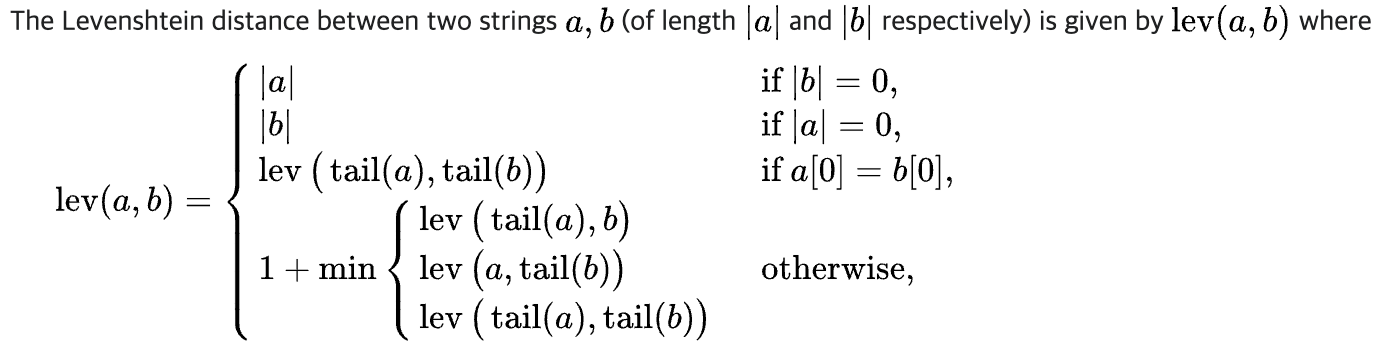

In [104]:
def lev(s1, s2):
    if len(s1) == 0:   # case 1
        return len(s2)
    if len(s2) == 0:   # case 2
        return len(s1)
    if s1[0] == s2[0]: # case 3
        return lev(s1[1:], s2[1:])
    else:
        return min([
            .5+lev(s1[1:], s2),    # case 4
            .5+lev(s1, s2[1:]),    # case 5
            .1+lev(s1[1:], s2[1:]),# case 6
        ])

In [161]:
# cost 를 내 마음대로!
lev('고대', '고려대학교'), \
lev('고려대학교', '고대'), \
lev('고려대학교', '고구려대학')

(3.1, 2.3, 0.4)

In [105]:
lev('고구려대학', '고려대학교')

0.4

In [ ]:
  고 려 대 학 교 => s2
고 (case3)
구   *  (case4 : s1 입장에서 보면 글자가 하나 삭제된 것)   + cost
려      (case5 : s2 입장에서 보면 글자가 하나 추가된 것)   + cost
대      (case6 : s1, s2에 서로 다른 글자가 들어갔으니 오타 또는 수정)  + cost
학
s1

In [ ]:
  고 려 대 학 교 => s2
0
s1   # case 1

In [ ]:
# case1.transpos() => case2

In [106]:
# HammingDist 보다 좀 더 자세히 해볼 수 있음
lev('Levenshtein', 'levenshtein')

0.1

In [109]:
hammingDist('고려대학교', '고구려대학'), lev('고려대학교', '고구려대학')
# lev 가 hammingDist 보다 더 좋음

(4, 0.4)

In [108]:
hammingDist('아녕', '안녕'), lev('아녕', '안녕')

(1, 0.1)

In [ ]:
# Dynamic Programming(재귀적)
# 텍스트 오타를 발견하는데 유리

In [ ]:
# 내일부터는 텍스트 마이닝 관련 중 정보검색을 할 거임
# 내일은 눈에 안 보이는 것으로 싸울 것. 머리속에 구조가 있어야 함.